# Assignment: Linear Models
## Foundations of Machine Learning
## Do Q1 and one other question.

**Q1.** Load `./data/Q1_clean.csv`. The data include

- `Price` per night
- `Review Scores Rating`: The average rating for the property
- `Neighbourhood `: The bourough of NYC. Note the space, or rename the variable.
- `Property Type`: The kind of dwelling
- `Room Type`: The kind of space being rented

1. Compute the average prices and scores by `Neighbourhood `; which bourough is the most expensive on average? Create a kernel density plot of price and log price, grouping by `Neighbourhood `.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv('./data/Q1_clean.csv')
df.head()

In [4]:
df.loc[:,['Price','Neighbourhood '] ].groupby('Neighbourhood ').describe()

Price                                                      \
                  count        mean         std   min     25%    50%    75%   
Neighbourhood                                                                 
Bronx             217.0   75.276498   39.755468  10.0   50.00   60.0   90.0   
Brooklyn         8487.0  127.747378  106.038466  20.0   75.00  100.0  150.0   
Manhattan       11763.0  183.664286  170.434606  25.0  103.00  150.0  214.0   
Queens           1590.0   96.857233   61.712648  25.0   60.00   80.0  115.0   
Staten Island      96.0  146.166667  508.462029  35.0   54.75   71.0   99.0   

                         
                    max  
Neighbourhood            
Bronx             244.0  
Brooklyn         4500.0  
Manhattan       10000.0  
Queens            950.0  
Staten Island    5000.0

> Manhattan is the most expensive, at 183 dollars a night on average, with a max of $10,000 a night.

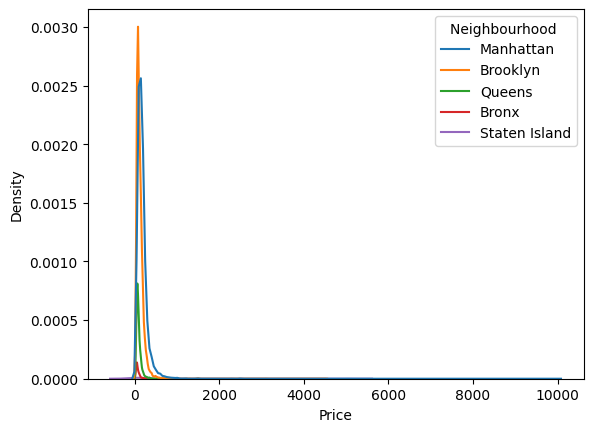

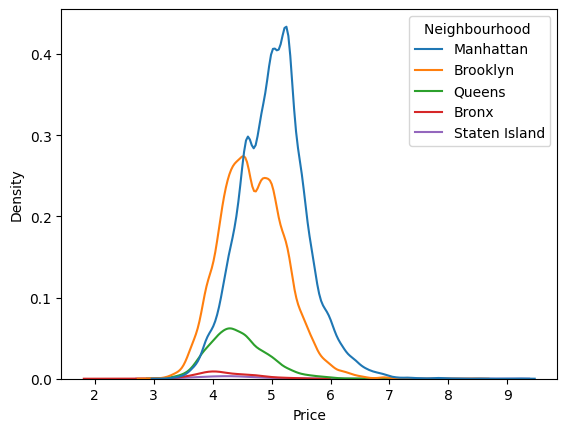

In [3]:
sns.kdeplot(x=df['Price'], hue=df['Neighbourhood '])
plt.show()

sns.kdeplot(x=np.log(df['Price']), hue=df['Neighbourhood '])
plt.show()

> So Manhattan is more expensive not just on average, but in terms of placing more weight on higher prices uniformly, then Brooklyn, then Queens, then the Bronx. Staten Island barely registers.

2. Regress price on `Neighbourhood ` by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?

In [6]:
y = df['Price']
X = pd.get_dummies(df['Neighbourhood '], dtype='int')

from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept=False).fit(X,y) # Run regression

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
results

,variable,coefficient
0,Bronx,75.276498
1,Brooklyn,127.747378
2,Manhattan,183.664286
3,Queens,96.857233
4,Staten Island,146.166667


> The groupwise means from part 1 are the same as the coefficients of a regression on the neighbourhood dummy. The regression is just computing the group averages, since we have no other control variables. Conversely, the regression coefficients for dummy variables are a group mean, controlling for everything else in the regression.

3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?

In [9]:
y = df['Price']
X = pd.get_dummies(df['Neighbourhood '], dtype='int', drop_first = True)

from sklearn import linear_model
reg = linear_model.LinearRegression().fit(X,y) # Run regression

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
results

,variable,coefficient
0,Brooklyn,52.470881
1,Manhattan,108.387789
2,Queens,21.580735
3,Staten Island,70.890169


In [10]:
print(reg.intercept_)

75.27649769584602


> It dropped the Bronx, which becomes the reference category, and its coefficient from the previous regression becomes the value of the intercept. All the coefficients for this regression are now relative to the Bronx: Adding the regression coefficient values to the intercept will yield the coefficients from the previous regression.

In [12]:
results = pd.DataFrame({'variable':reg.feature_names_in_, 
                        'coefficient': reg.coef_+reg.intercept_}) # Regression coefficients
results

,variable,coefficient
0,Brooklyn,127.747378
1,Manhattan,183.664286
2,Queens,96.857233
3,Staten Island,146.166667


> It is just nice to know how one-hot encoding/dummy variables work, mechanically.

4. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood `. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?

In [14]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

y = df['Price']
X = df.loc[:,['Review Scores Rating', 'Neighbourhood '] ]
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=100) # For replication purposes

Z_train = pd.concat([X_train['Review Scores Rating'], 
                     pd.get_dummies(X_train['Neighbourhood '], dtype='int')], axis = 1)
Z_test = pd.concat([X_test['Review Scores Rating'], 
                    pd.get_dummies(X_test['Neighbourhood '], dtype='int')], axis = 1)

reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train) # Run regression

y_hat = reg.predict(Z_test)
print('Rsq: ', reg.score(Z_test,y_test)) # R2
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse) # R2

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
results

Rsq:  0.06701086106947296
RMSE:  125.01092061382933


,variable,coefficient
0,Review Scores Rating,1.032257
1,Bronx,-17.261392
2,Brooklyn,32.180888
3,Manhattan,89.421020
4,Queens,4.050208
5,Staten Island,61.576393


> The most expensive property you can rent is a 100-rated place in Manhattan, for about 192.64 per night

In [16]:
100*1.032257 + 89.4

192.6257

5. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood ` and `Room Type`. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?

In [26]:
y = df['Price']
X = df.loc[:,['Review Scores Rating', 'Neighbourhood ', 'Room Type'] ]
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=100) # For replication purposes

Z_train = pd.concat([X_train['Review Scores Rating'], 
                    pd.get_dummies(X_train['Neighbourhood '], dtype='int'),
                    pd.get_dummies(X_train['Room Type'], dtype='int')],
                    axis = 1)
Z_test = pd.concat([X_test['Review Scores Rating'], 
                    pd.get_dummies(X_test['Neighbourhood '], dtype='int'),
                    pd.get_dummies(X_test['Room Type'], dtype='int')],
                    axis = 1)
reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train) # Run regression
y_hat = reg.predict(Z_test)
print('Rsq: ', reg.score(Z_test,y_test)) # R2
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse) # R2
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
results

Rsq:  0.22035348129282295
RMSE:  114.27692123130635


,variable,coefficient
0,Review Scores Rating,0.626912
1,Bronx,-13.022765
2,Brooklyn,10.378456
3,Manhattan,53.693304
4,Queens,-6.833330
5,Staten Island,50.003022
6,Entire home/apt,110.617820
7,Private room,3.101341
8,Shared room,-19.500474


> A 100-rated Entire home/apt in Manhattan would cost:

In [23]:
110.617+53.69+100*.0626

170.567

6. What does the coefficient on `Review Scores Rating` mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works.

> In part 4, it was 1.03 and in part 5 it was 0.63. When we do multiple linear regression, you can imagine first regression your $y$ and $x$ of interest on all the other variables, then saving the residuals, then regressing those residuals on each other. So in part 4 we didn't include the information about the room type, and in part 5 we did. What we're seeing is that some of the variation in prices by rating and neighbourhood is explained by the room types available in those neighbourhoods. Once we control for room type, the other variables become less powerful predictors because some of their predictive power is correlated with room type. That's why the coefficient on rating shrinks.

7. (Optional) We've included `Neighborhood ` and `Room Type` separately in the model. How do you interact them, so you can have "A bedroom in Queens" or "A shared room in Manhattan". Split the sample 80/20 into a training and a test set and run a regression including that kind of "property type X neighborhood" dummy, plus `Review Scores Rating`. How does the slope coefficient for `Review Scores Rating`, the $R^2$, and the RMSE change? Do they change significantly compares to part 5? Are the coefficients in this regression just the sum of the coefficients for `Neighbourhood ` and `Property Type` from 5? What is the most expensive kind of property you can rent? 

In [28]:
y = df['Price']
df['nbhdXroom'] = df['Neighbourhood '].astype('str')+'X'+df['Room Type'].astype('str')
X = df.loc[:,['Review Scores Rating', 'nbhdXroom'] ]
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=100) # For replication purposes

Z_train = pd.concat([X_train['Review Scores Rating'], 
                    pd.get_dummies(X_train['nbhdXroom'], dtype='int')],
                    axis = 1)
Z_test = pd.concat([X_test['Review Scores Rating'], 
                    pd.get_dummies(X_test['nbhdXroom'], dtype='int')],
                    axis = 1)

reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train) # Run regression

y_hat = reg.predict(Z_test)
print('Rsq: ', reg.score(Z_test,y_test)) # R2
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse) # R2
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
results

Rsq:  0.2227250747073225
RMSE:  114.10298034724303


,variable,coefficient
0,Review Scores Rating,0.631849
1,BronxXEntire home/apt,63.133021
2,BronxXPrivate room,3.736301
3,BronxXShared room,-21.278036
4,BrooklynXEntire home/apt,113.784926
5,BrooklynXPrivate room,20.579025
6,BrooklynXShared room,-3.210858
7,ManhattanXEntire home/apt,169.494389
8,ManhattanXPrivate room,45.531833
9,ManhattanXShared room,24.553861


> The $R^2$ barely goes up (.220 to .222), so it's not like the added complexity really improves the model. But, we can see how different rooms in different neighbourhoods have different rental prices. For example, a private room in Manhattan starts at a price of $45/night, which was $56/night in the last regression. Likewise, that Sten Island X Entire home price is huge. We could, perhaps, dig into that a bit more to find out what kinds of outliers are driving that huge coefficient. It's interesting that the most expensive property you can rent here is a 100-rated home/apt in State Island, for a nightly rate of 

In [29]:
234.96+100*.63

297.96000000000004

**Q2.** This question is a case study for linear models. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv 
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.

<Axes: >

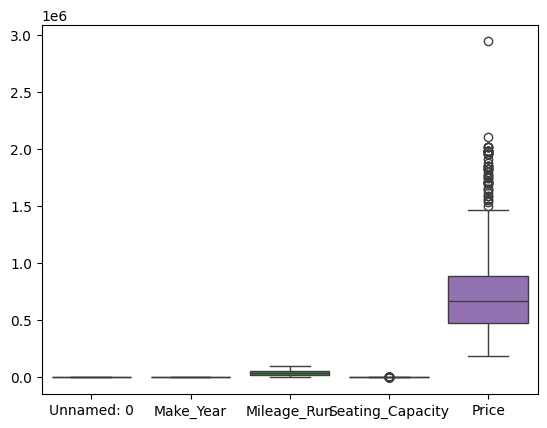

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv('./data/cars_hw.csv')
df0 = df # Save the original data for a few plots
sns.boxplot(data=df)

In [42]:
print(df.columns)

Index(['Unnamed: 0', 'Make', 'Make_Year', 'Color', 'Body_Type', 'Mileage_Run',
       'No_of_Owners', 'Seating_Capacity', 'Fuel_Type', 'Transmission',
       'Transmission_Type', 'Price'],
      dtype='object')


<Axes: >

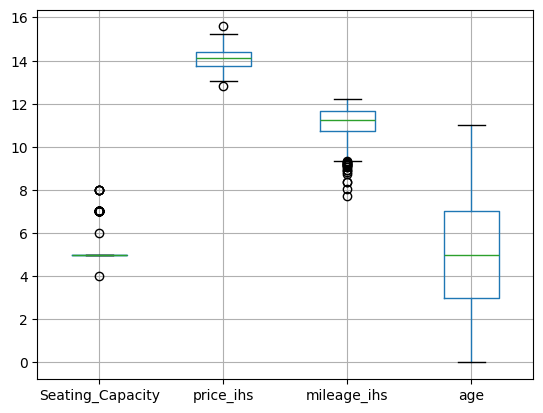

In [43]:
df['price_ihs'] = np.arcsinh(df['Price'])
df['mileage_ihs'] = np.arcsinh(df['Mileage_Run'])
df['age'] = max(df['Make_Year'])-df['Make_Year']
df = df.drop(['Price','Mileage_Run','Make_Year','Unnamed: 0'],axis=1)
df.boxplot()

  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?

,count,mean,std,min,25%,50%,75%,max
Make,,,,,,,,
Chevrolet,6.0,4.535000e+05,2.466064e+05,267000.0,288500.0,345500.0,537500.0,892000.0
Datsun,3.0,2.896667e+05,1.050397e+04,279000.0,284500.0,290000.0,295000.0,300000.0
Ford,52.0,7.211731e+05,1.409277e+05,290000.0,635000.0,707500.0,787000.0,1066000.0
Honda,73.0,7.989726e+05,2.665091e+05,316000.0,581000.0,785000.0,915000.0,1537000.0
Hyundai,305.0,6.918918e+05,2.791597e+05,248000.0,485000.0,638000.0,837000.0,1742000.0
Jeep,4.0,1.499500e+06,1.525134e+05,1290000.0,1447500.0,1529500.0,1581500.0,1649000.0
Kia,8.0,1.614750e+06,1.190567e+05,1369000.0,1579000.0,1628500.0,1705750.0,1741000.0
MG Motors,35.0,1.869457e+06,1.216611e+05,1589000.0,1786500.0,1848000.0,1978000.0,2019000.0
Mahindra,18.0,1.100167e+06,1.755493e+05,796000.0,1037000.0,1094500.0,1157000.0,1465000.0


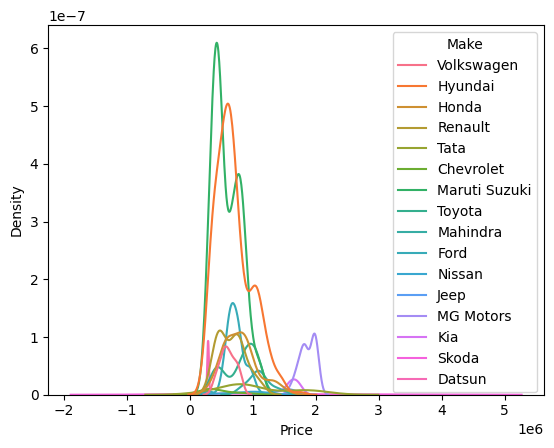

In [44]:
sns.kdeplot(data = df0, x='Price',hue='Make')
df0['Price'].groupby(df0['Make']).describe()

,count,mean,std,min,25%,50%,75%,max
Make,,,,,,,,
Chevrolet,6.0,13.613042,0.480975,13.188151,13.261539,13.445433,13.864828,14.394369
Datsun,3.0,13.269194,0.036311,13.232114,13.251449,13.270783,13.287734,13.304685
Ford,52.0,14.161427,0.210895,13.270783,14.054527,14.162640,14.269131,14.572571
Honda,73.0,14.229465,0.336972,13.356645,13.965653,14.266586,14.419827,14.938490
Hyundai,305.0,14.061658,0.398781,13.114331,13.785051,14.059241,14.330727,15.063692
Jeep,4.0,14.909738,0.105084,14.763300,14.876417,14.933413,14.966733,15.008827
Kia,8.0,14.985324,0.076877,14.822738,14.965389,14.996253,15.042662,15.063117
MG Motors,35.0,15.132199,0.066263,14.971763,15.088892,15.122762,15.190744,15.211260
Mahindra,18.0,14.592100,0.159906,14.280502,14.544955,14.598828,14.654396,14.890513


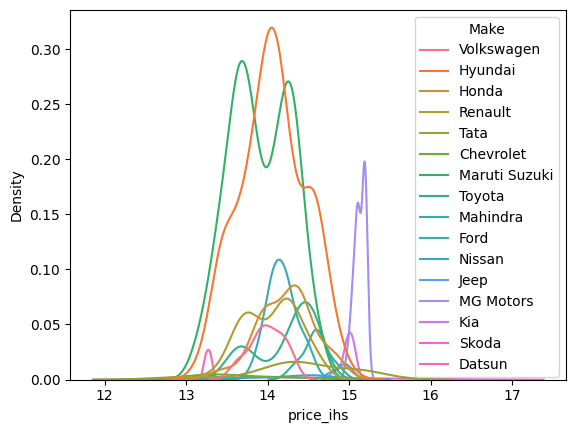

In [45]:
sns.kdeplot(data=df,x='price_ihs',hue='Make')
df['price_ihs'].groupby(df['Make']).describe()

> The MG Motors cars are by far the most expensive, then Kia, then Jeep. The kernel density plot shows that car prices are typically single peaked, except for Maruti Suzuki and Toyota. I thought there would be more of this multi-peakedness, where each peak corresponded to a particular quality/price point in the market (e.g. an entry level sedan, a luxury sedan, an SUV, and a sportscar). Prices range from 188,000 for a cheap Tata to 2,941,000 for an expensive Skoda. These are Indian Rupees, so the Skoda would cost 35,281.77 dollars and the Tata would cost 2,255.35 dollars.

<Axes: xlabel='price_ihs', ylabel='Density'>

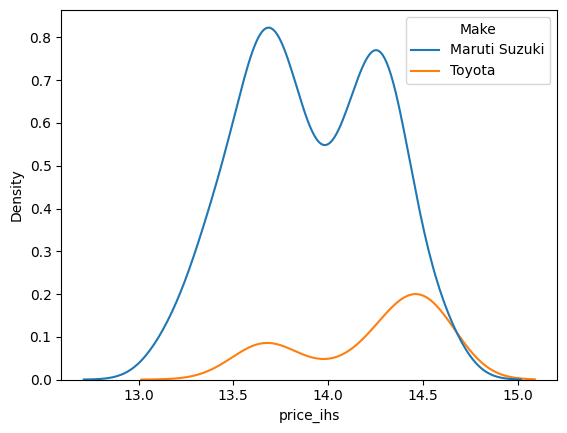

In [46]:
sns.kdeplot(data=df.loc[ df['Make'].isin(['Maruti Suzuki','Toyota'])  ,:],x='price_ihs',hue='Make')

  3. Split the data into an 80% training set and a 20% testing set.

In [47]:
# Randomize the rows in the dataframe:
N = df.shape[0]
df = df.sample(frac=1, random_state=100) # randomize the order in which data appears
train_size = int(.8*N)

# How to do the split as needed:
df_train = df[0:train_size]
y_train = df_train['price_ihs']

df_test = df[train_size:]
y_test = df_test['price_ihs']

# So the first 0:train_size rows are my training data, and train_size: are my test data.


  4. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use `pd.get_dummies()`; be careful of the dummy variable trap); what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?

In [48]:
from sklearn import linear_model

# Numeric regression:
var_n = ['age','mileage_ihs','Seating_Capacity'] # Select variables
X_train_n = df_train.loc[:,var_n] # Process training covariates
reg_n = linear_model.LinearRegression().fit(X_train_n,y_train) # Run regression
X_test_n = df_test.loc[:,var_n] # Process test covariates
y_hat = reg_n.predict(X_test_n)
print('Numeric only Rsq: ', reg_n.score(X_test_n,y_test)) # R2
rmse_n = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('Numeric only RMSE: ', rmse_n) # R2

Numeric only Rsq:  0.45254262356326824
Numeric only RMSE:  0.3339265473590646


In [49]:
# Categorical regression:
var_cat = ['Make','Body_Type','Color','Fuel_Type','Transmission','Transmission_Type']
#
# Use a loop to make the dummy dataframe, but you could do it by hand in a bunch of lines:
dummies = pd.DataFrame([]) # In general, use lists and append instead of DataFrame and pd.concat
for var in var_cat: 
    new_dummies = pd.get_dummies( df.loc[:,var], drop_first=True, dtype=int)
    dummies = pd.concat([dummies, new_dummies], axis=1, ignore_index=True) 
    X_train_c = dummies.iloc[0:train_size,:]
    X_test_c = dummies.iloc[train_size:,:]
#
reg_c = linear_model.LinearRegression().fit(X_train_c,y_train) # Run regression
y_hat_c = reg_c.predict(X_test_c)
print('Categorical only Rsq: ', reg_c.score(X_test_c,y_test)) # R2
rmse_c = np.sqrt( np.mean( (y_test - y_hat_c)**2 ))
print('Categorical only RMSE: ', rmse_c) # R2

Categorical only Rsq:  0.6298129532407465
Categorical only RMSE:  0.27459106425227264


In [50]:
# Combine numeric _n and categorical _c variables:
X_train_all = pd.concat([X_train_n, X_train_c],axis=1, ignore_index=True)
X_test_all = pd.concat([X_test_n, X_test_c],axis=1, ignore_index=True)
#
reg_all = linear_model.LinearRegression().fit(X_train_all,y_train) # Run regression
y_hat_all = reg_all.predict(X_test_all)
print('All Rsq: ', reg_all.score(X_test_all,y_test)) # R2
rmse_all = np.sqrt( np.mean( (y_test - y_hat_all)**2 ))
print('All RMSE: ', rmse_all) # R2

All Rsq:  0.7999206763763922
All RMSE:  0.20187237686198908


> The joint model with numeric and categorical variables performs the best, achieving an Rsq of .716 and RMSE of .21. The numeric only achieved .328/.317 and the categorical only achieved .493/.275. So in this case, expanding the set of features improved the performance of the model.

  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 4?

In [51]:
from sklearn.preprocessing import PolynomialFeatures

for d in np.arange(1,5):
    expander = PolynomialFeatures(degree=d,include_bias=False)
    #
    # Expand variables:
    Z = expander.fit_transform(X_test_n)
    names = expander.get_feature_names_out() # Get the names of these variables
    X_test_d = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe
    Z = expander.fit_transform(X_train_n)
    names = expander.get_feature_names_out() # Get the names of these variables
    X_train_d = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe
    X_train_d.reset_index(drop=True, inplace=True)
    X_train_c.reset_index(drop=True, inplace=True)
    X_train_all = pd.concat([X_train_d, X_train_c], axis=1, ignore_index=True)
    #
    # Reset indices for concatenating:
    X_test_d.reset_index(drop=True, inplace=True)
    X_test_c.reset_index(drop=True, inplace=True)
    X_test_all = pd.concat([X_test_d, X_test_c], axis=1, ignore_index=True)
    #
    # Regression metrics:
    reg_all = linear_model.LinearRegression().fit(X_train_all,y_train) # Run regression
    print(d, ' Rsq: ', reg_all.score(X_test_all,y_test)) # R2
    y_hat_all = reg_all.predict(X_test_all)
    rmse_all = np.sqrt( np.mean( (y_test - y_hat_all)**2 ))
    print(d, 'RMSE: ', rmse_all) # R2


1  Rsq:  0.7999206763763922
1 RMSE:  0.20187237686198908
2  Rsq:  0.8025408094604647
2 RMSE:  0.2005462138908573
3  Rsq:  0.7996599800454532
3 RMSE:  0.20200385035775753
4  Rsq:  -2084585043.941694
4 RMSE:  20605.61589941038


> So the best degree is 2: An Rsq of .74 and a RMSE of .196. After that, performance falls, with a negative Rsq for degree=4.

6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

<Axes: xlabel='price_ihs'>

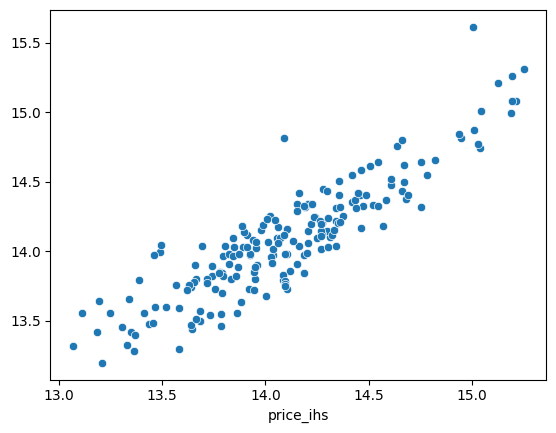

In [52]:
# Reuse earlier code to get predictions:
d = 2
#
expander = PolynomialFeatures(degree=d,include_bias=False)
Z = expander.fit_transform(X_test_n)
names = expander.get_feature_names_out() # Get the names of these variables
X_test_d = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe
#
Z = expander.fit_transform(X_train_n)
names = expander.get_feature_names_out() # Get the names of these variables
X_train_d = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe
#
X_train_d.reset_index(drop=True, inplace=True)
X_train_c.reset_index(drop=True, inplace=True)
X_train_all = pd.concat([X_train_d, X_train_c], axis=1)
X_train_all.columns = X_train_all.columns.astype(str)
# Reset indices for concatenating:
X_test_d.reset_index(drop=True, inplace=True)
X_test_c.reset_index(drop=True, inplace=True)
X_test_all = pd.concat([X_test_d, X_test_c], axis=1)
X_test_all.columns = X_test_all.columns.astype(str)
# Run regression   
reg_all = linear_model.LinearRegression().fit(X_train_all,y_train) # Run regression
# Predictions and residuals:
y_hat_all = reg_all.predict(X_test_all)
residuals = y_test - y_hat_all

# Scatterplot:
sns.scatterplot(x=y_test,y=y_hat_all)

> Looks like the values line up pretty well along the diagonal.

<Axes: xlabel='price_ihs', ylabel='Density'>

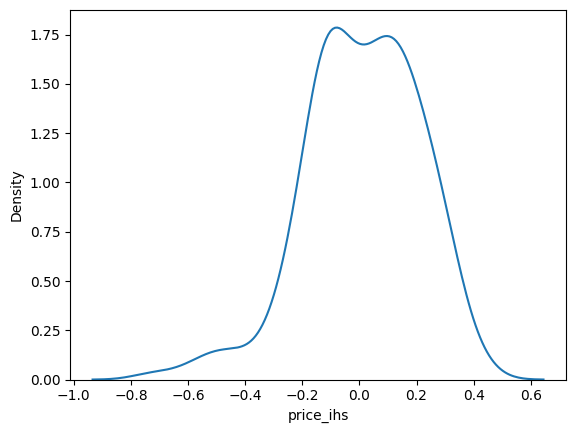

In [53]:
sns.kdeplot(residuals)

> Looks slightly bi-modal with a bit of a left tail, but otherwise symmetric around zero and bell-shaped. Those two peaks might be a statistical artifact that would vanish if we did the test-train split differently, or it might be a real feature of the data. The bi-modal nature suggests there's more discrete, unobserved heterogeneity in the data that could explain why there are multiple peaks that we're just missing.

In [54]:
from sklearn import tree 

X_train_n.reset_index(drop=True, inplace=True)
X_train_c.reset_index(drop=True, inplace=True)
X_train_all = pd.concat([X_train_n, X_train_c],axis=1)
X_train_all.columns = X_train_all.columns.astype(str)
X_test_n.reset_index(drop=True, inplace=True)
X_test_c.reset_index(drop=True, inplace=True)
X_test_all = pd.concat([X_test_n, X_test_c],axis=1)
X_test_all.columns = X_test_all.columns.astype(str)

sup_depth = 20
for d in np.arange(2,sup_depth):
    model = tree.DecisionTreeRegressor(max_depth=d) # Fit the classifier
    cart = model.fit(X_train_all, y_train) # 
    cart.score(X_test_all,y_test)
    y_hat = cart.predict(X_test_all)
    rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
    print('Depth: ', d, ', RMSE: ', rmse, ', Rsq: ', cart.score(X_test_all,y_test)) # R2


Depth:  2 , RMSE:  0.301461249042225 , Rsq:  0.5538186573009449
Depth:  3 , RMSE:  0.2708659626214611 , Rsq:  0.6397887383319372
Depth:  4 , RMSE:  0.24859265755663448 , Rsq:  0.6965934082540736
Depth:  5 , RMSE:  0.23551721719289118 , Rsq:  0.7276710948880607
Depth:  6 , RMSE:  0.24243086639047995 , Rsq:  0.711447896404317
Depth:  7 , RMSE:  0.22730314423405334 , Rsq:  0.7463357268533017
Depth:  8 , RMSE:  0.22636367624870854 , Rsq:  0.7484282362667853
Depth:  9 , RMSE:  0.21911989824147127 , Rsq:  0.7642715216730743
Depth:  10 , RMSE:  0.25209791958608546 , Rsq:  0.6879767608029796
Depth:  11 , RMSE:  0.23130491455629498 , Rsq:  0.737325364454761
Depth:  12 , RMSE:  0.23749576221020036 , Rsq:  0.7230762864324479
Depth:  13 , RMSE:  0.26783962840684744 , Rsq:  0.6477929172599354
Depth:  14 , RMSE:  0.2352046342119607 , Rsq:  0.728393495500176
Depth:  15 , RMSE:  0.2650040079362365 , Rsq:  0.6552110790999193
Depth:  16 , RMSE:  0.23991913441327947 , Rsq:  0.7173960749458405
Depth:  17 

**Q3.** The is a question about regression using linear models. The data include wages at data science-y jobs, including

  - `Rating`: Company worker happiness score
  - `Size`: Number of employees
  - `Sector`: Part of the economy
  - `avg_salary`: Average wage
  - `job_state`: Location of work

  1. Load the `wages_hw.csv` file. Split the sample into an ~80% training set and a ~20% test set. Do any necessary cleaning, including outliers and missings.

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./data/wages_hw.csv')
df = df.drop(['Unnamed: 0'],axis=1)
df['Intercept'] = np.ones(df.shape[0])
print( np.sum(df.isnull()))

Rating        0
Size          0
Sector        0
avg_salary    0
job_state     0
Intercept     0
dtype: int64


/home/trj/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [56]:
df['Sector'] = df['Sector'].str.replace('-1','Missing')

In [57]:
df.head()

,Rating,Size,Sector,avg_salary,job_state,Intercept
0,3.8,501 to 1000 employees,Aerospace & Defense,72.0,NM,1.0
1,3.4,10000+ employees,Health Care,87.5,MD,1.0
2,4.8,501 to 1000 employees,Business Services,85.0,FL,1.0
3,3.8,1001 to 5000 employees,"Oil, Gas, Energy & Utilities",76.5,WA,1.0
4,2.9,51 to 200 employees,Business Services,114.5,NY,1.0


In [58]:
df.describe()

,Rating,avg_salary,Intercept
count,731.000000,731.000000,731.0
mean,3.688372,100.090971,1.0
std,0.570353,38.537585,0.0
min,1.900000,13.500000,1.0
25%,3.300000,73.000000,1.0
50%,3.700000,96.500000,1.0
75%,4.000000,122.500000,1.0
max,5.000000,254.000000,1.0


<Axes: >

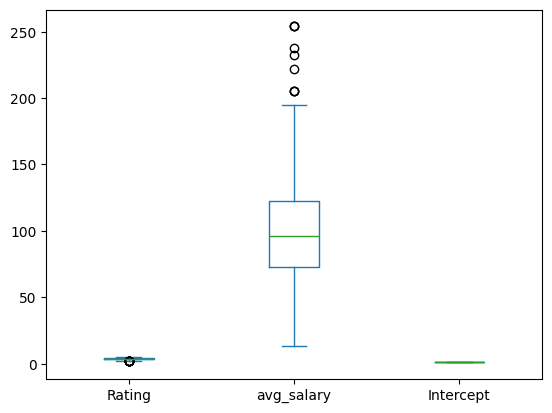

In [59]:
df.plot.box()

> It looks like some salaries are outliers, but I am going to leave them in because their values aren't too far outside the whiskers (200 versus 250 with a median of 100).

In [60]:
tab = df['Sector'].value_counts()

In [61]:
np.random.seed(1000)

N = df.shape[0]
train_size = int(.8*N)

index = np.arange(N)
np.random.shuffle(index)

train_rows = index[:train_size]
test_rows = index[train_size:]

y = df['avg_salary']
y_train = y.iloc[train_rows]
y_test = y.iloc[test_rows]

  2. Use a linear model to regress `avg_salary` on `Sector`. Which sectors have the highest predicted wages? What is the $R^2$ and `RMSE` on the test set? 

In [62]:
from sklearn import linear_model

dummies = pd.get_dummies( df.loc[:,'Sector'], dtype=int)
X_train = dummies.iloc[train_rows,:]
X_test = dummies.iloc[test_rows,:]
#
reg = linear_model.LinearRegression(fit_intercept=False).fit(X_train,y_train) # Run regression

# Extract wage dummies
rdf = pd.DataFrame({'variable': reg.feature_names_in_, 'slope':reg.coef_})
rdf.sort_values(by='slope',axis=0)

,variable,slope
6,"Construction, Repair & Maintenance",26.500000
3,"Arts, Entertainment & Recreation",48.500000
11,Health Care,68.837500
24,Travel & Tourism,70.142857
19,"Oil, Gas, Energy & Utilities",78.181818
18,Non-Profit,79.700000
2,Agriculture & Forestry,80.500000
14,Manufacturing,80.537037
10,Government,86.055556
5,Business Services,96.239726


> Media, Accounting and Legal, Information Technology, and Biotech and Pharma have the highest values. 

In [63]:
# Rsq and RMSE
y_hat = reg.predict(X_test)
print('Rsq: ', reg.score(X_test,y_test)) # R2
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ) )
print('RMSE: ', rmse) 

Rsq:  0.10786156021224103
RMSE:  31.81255349338017


> The Rsq is not so bad! At least it is non-negative.

  3. Make a scatterplot of `avg_salary` and `Rating`. Is there an obvious visual relationship between the two variables? Regress `avg_salary` on `Rating` as a numeric variable: Do higher ratings predict higher or lower wages? Convert `Rating` to a one-hot encoded variable, with a category for each rating. Run a regression of `avg_salary` on the categorical version. How do your results change? Explain. Which version has a higher $R^2$ and lower `RMSE`?

<Axes: xlabel='Rating', ylabel='avg_salary'>

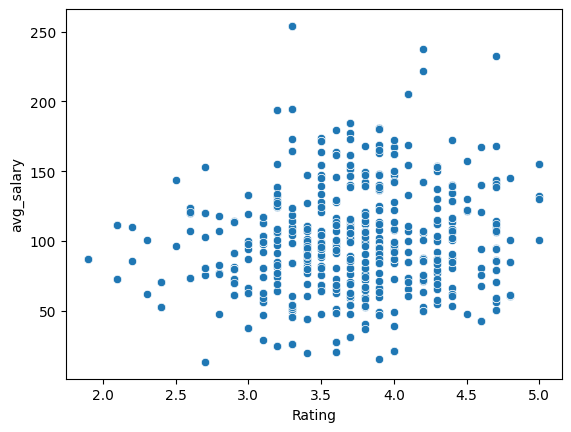

In [64]:
sns.scatterplot(data=df,x='Rating',y='avg_salary')

> Looks like a cloud of points to me, with no particular relationship. I will not be surprised if the Rsq is not strictly positive. 

In [65]:
from sklearn import linear_model

X_train = df.loc[train_rows,['Intercept','Rating'] ]
X_test = df.loc[test_rows,['Intercept','Rating'] ]

reg = linear_model.LinearRegression(fit_intercept=False).fit(X_train,y_train) # Run regression

# Rsq and RMSE
X_test = df.loc[test_rows, ['Intercept','Rating'] ]
print('Rsq: ', reg.score(X_test,y_test)) # R2
y_hat = reg.predict(X_test)
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse) 

fx_num = reg.coef_[0] + reg.coef_[1]*np.arange(2,6,1)
gdf1 = pd.DataFrame({'Rating':np.arange(2,6,1),'Effect':fx_num,'Version':'Numeric'})

rdf = pd.DataFrame({'variable': reg.feature_names_in_, 'slope':reg.coef_})
rdf.sort_values(by='slope',axis=0)


Rsq:  0.0012158997447975217
RMSE:  33.660317944994524


,variable,slope
1,Rating,9.461627
0,Intercept,65.851291


> So if rating goes up by 1, predicted wages go up by 9.5k, with a starting salary for "zero star" companies of 65k. That Rsq is not so great, but we didn't see a strong relationship between rating and avg_salary in the scatterplot anyway.

In [66]:
# Let's one-hot encode the ratings
df['Rating_rnd'] = df['Rating'].round()

X_train = df.loc[train_rows,['Rating_rnd'] ]
dummies_train = pd.get_dummies(X_train['Rating_rnd'],dtype=int)

reg = linear_model.LinearRegression(fit_intercept=False).fit(dummies_train,y_train) # Run regression

# Rsq and RMSE
X_test = df.loc[test_rows,['Rating_rnd'] ]
dummies_test = pd.get_dummies(X_test['Rating_rnd'],dtype=int)
y_hat = reg.predict(dummies_test)

print('Rsq: ', reg.score(dummies_test,y_test)) # R2
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse) 

rdf = pd.DataFrame({'variable': dummies_train.columns, 'slope':reg.coef_})
rdf

Rsq:  -0.003408188834975734
RMSE:  33.73814685499916


,variable,slope
0,2.0,81.735294
1,3.0,95.054878
2,4.0,104.227528
3,5.0,102.457447


> What's the real difference between the numeric regression and the dummy regression? You can see in the next plot, the numeric regression forces all the points onto a line with the same slope, while the dummy version allows the "step sizes" between ratings to vary.
> That Rsq is not great! It is less than zero, which means that using the mean of the training data as a predictor rather than the dummies does a better job on the test set. It's not the end of the world, don't do more work. 

<Axes: xlabel='Rating', ylabel='Effect'>

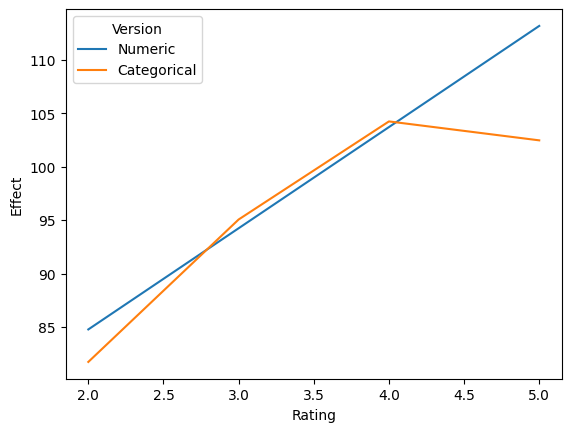

In [67]:
gdf2 = pd.DataFrame({'Rating':np.arange(2,6,1),'Effect':reg.coef_,'Version':'Categorical'})
gdf =  pd.concat([gdf1,gdf2],axis=0)
sns.lineplot(data=gdf,x='Rating',y='Effect',hue='Version')

> So going from 4 star to 5 star seems to possibly flatten or reduce wages. Why might that be? One possible explanation: If you're at a place where it's actually nice to work, that's part of your compensation and they don't have to pay as much to get you to work there.

  4. Now interact `Sector` with the categorical version of `Rating`, so your regressors are a (Sector, Rating) pair; this is a programming puzzle you'll have to think about, but using the `.PolynomialFeatures()` function on the one-hot encoded categorical variables is one option, and another is pre-processing a new variable that interacts `Sector` and `Rating` and then one-hot encoding the result. Regress `avg_salary` on the (Sector, Rating) pairs. How does the $R^2$ and `RMSE` on the test set compare to part 2? Interpret the coefficients; which sector-rating pairs have the highest wages?

In [68]:
df['SxR'] = df.loc[:,'Sector'] + 'X' + df.loc[:,'Rating_rnd'].astype(str)
dummies = pd.get_dummies(df.loc[:,'SxR'], dtype=int ) 

# Fit linear model
dummies_train = dummies.iloc[train_rows,:]
reg = linear_model.LinearRegression(fit_intercept=False).fit(dummies_train,y_train) # Run regression
rdf = pd.DataFrame({'variable': dummies_train.columns, 'slope':reg.coef_})
print(rdf.sort_values(by='slope',axis=0).to_string())

                                  variable       slope
14  Construction, Repair & MaintenanceX3.0   26.500000
47                  TelecommunicationsX3.0   44.000000
39                          Non-ProfitX3.0   47.500000
5     Arts, Entertainment & RecreationX4.0   48.500000
31                       ManufacturingX2.0   52.500000
20                             FinanceX5.0   56.750000
24                         Health CareX4.0   58.413043
51                    Travel & TourismX4.0   70.142857
41        Oil, Gas, Energy & UtilitiesX4.0   78.181818
4               Agriculture & ForestryX5.0   80.500000
23                         Health CareX3.0   82.941176
21                          GovernmentX3.0   83.928571
3                  Aerospace & DefenseX5.0   84.357143
32                       ManufacturingX3.0   84.794118
18                             FinanceX3.0   86.625000
44                              RetailX2.0   86.833333
33                       ManufacturingX4.0   87.166667
7         

In [69]:
dummies_test = dummies.iloc[test_rows,:]
y_hat = reg.predict(dummies_test)
print('Rsq: ', reg.score(dummies_test,y_test)) # R2
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse) 

Rsq:  0.23491600794936873
RMSE:  29.460286188024984


**Q4.** This is a question about linear regression. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent 
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.

In [70]:
df = pd.read_csv('./data/pretrial_data.csv')
print(df.head())

df['held'] = df['held_wo_bail'].astype(int)
df['sex'] = df['sex'].replace(['M','F'],['Male','Female'])
df['Black'] = (df['race']=='B').astype(int)
rdf = df.loc[:,['held','Black','sex','case_type','is_poor','prior_F']]
rdf = rdf.dropna()
rdf['held'].value_counts()

   Unnamed: 0 case_type   age sex race  is_poor  bond  bond_type  prior_F  \
0           0         F  31.0   M    W      NaN   NaN          7      0.0   
1           1         F  60.0   M    B      NaN   NaN          7     13.0   
2           2         M  27.0   M    W      NaN   NaN          7      0.0   
3           3         M  27.0   M    B      0.0   NaN          7      0.0   
4           4         F  28.0   F    W      0.0   NaN          7      0.0   

   prior_M  gini  released  sentence_type   sentence  bond_NA  held_wo_bail  \
0      0.0  0.44       NaN            NaN        NaN     True         False   
1     21.0  0.44       0.0            0.0  60.000000     True         False   
2      0.0  0.44       0.0            1.0  12.000000     True         False   
3      9.0  0.44       0.0            1.0   0.985626     True         False   
4      0.0  0.44       1.0            4.0   0.000000     True         False   

   sentence_NA  
0         True  
1        False  
2        Fa

held
0    15844
1     5710
Name: count, dtype: int64

2. Create a dummy variable indicating that the defendant is Black.

In [71]:
df['Black'] = (df['race']=='B').astype(int)

3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?

In [72]:
from sklearn.linear_model import LinearRegression # Import linear regression model

4. Before doing this question, please think for a few minutes about how to make the process of running these regressions as efficient as possible, before jumping into writing code. Repeat part 3, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.

In [73]:
from sklearn.linear_model import LinearRegression # Import linear regression model

sex_dummies = pd.get_dummies(rdf['sex'],dtype='int',drop_first=True)
case_type_dummies = pd.get_dummies(rdf['case_type'],dtype='int',drop_first=True)

## Black and Sex
y = rdf['held']
X = pd.concat([rdf['Black'],sex_dummies],axis=1)
reg = LinearRegression().fit(X,y)
sdf = pd.DataFrame({'variable': X.columns, 'slope':reg.coef_})
sdf

,variable,slope
0,Black,0.063244
1,Male,0.101377


In [74]:
## Black and Sex and is_poor
y = rdf['held']
X = pd.concat([rdf.loc[:,['Black','is_poor']],sex_dummies],axis=1)
reg = LinearRegression().fit(X,y)
sdf = pd.DataFrame({'variable': X.columns, 'slope':reg.coef_})
sdf

,variable,slope
0,Black,0.036386
1,is_poor,0.185337
2,Male,0.114845


In [75]:
## Black and Sex and is_poor and prior_F
y = rdf['held']
X = pd.concat([rdf.loc[:,['Black','is_poor','prior_F']],sex_dummies],axis=1)
reg = LinearRegression().fit(X,y)
sdf = pd.DataFrame({'variable': X.columns, 'slope':reg.coef_})
sdf

,variable,slope
0,Black,0.026643
1,is_poor,0.167606
2,prior_F,0.026004
3,Male,0.097799


In [76]:
## Black and Sex and is_poor and prior_F and case_type
y = rdf['held']
X = pd.concat([rdf.loc[:,['Black','is_poor','prior_F']],sex_dummies,case_type_dummies],axis=1)
reg = LinearRegression().fit(X,y)
sdf = pd.DataFrame({'variable': X.columns, 'slope':reg.coef_})
sdf

,variable,slope
0,Black,0.019542
1,is_poor,0.073680
2,prior_F,0.016164
3,Male,0.084493
4,I,-0.508384
5,M,-0.421186
6,S,-0.139857


5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.

In [77]:
rdf.head()

,held,Black,sex,case_type,is_poor,prior_F
3,0,1,Male,M,0.0,0.0
4,0,0,Female,F,0.0,0.0
5,0,1,Male,M,0.0,1.0
6,0,1,Female,F,1.0,0.0
7,0,1,Male,M,0.0,0.0


In [78]:
rdf['raceXsex'] = rdf['Black'].replace([0,1],['Other','Black'])+'x'+rdf['sex']
rdf['raceXsex']

3          BlackxMale
4        OtherxFemale
5          BlackxMale
6        BlackxFemale
7          BlackxMale
             ...     
22980      OtherxMale
22981      BlackxMale
22983      BlackxMale
22984    BlackxFemale
22985      BlackxMale
Name: raceXsex, Length: 21554, dtype: object

In [79]:
y = rdf['held']
X = pd.get_dummies(rdf['raceXsex'],dtype=int)
reg = LinearRegression(fit_intercept=False).fit(X,y)
sdf = pd.DataFrame({'variable': X.columns, 'slope':reg.coef_})
sdf

,variable,slope
0,BlackxFemale,0.174618
1,BlackxMale,0.347722
2,OtherxFemale,0.196509
3,OtherxMale,0.253858


> What's interesting here is that Black women have a base probability of .17 of being held without bail, which is the lowest. On the other hand, Black men have a predicted probability of .35 of being held without bail, more than double. Other races have, on average, probabilities in the middle, of .2 for women and .25 for men. One thing to notice is that all of these numbers are surprisingly high: 1 in 10 or 1 in 3 people are held without bail before their trial? This does not seem consistent with "innocent until proven guilty." I think this is interesting but not entirely unexpected, but I would want to look into the data more before making guesses about what's driving the numbers.

6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

> Before getting into this, I just want to reiterate that I ask these questions because I care about how data are used and how the tools impact vulnerable people in society. This situation is statistically and computationally more complex than you probably think. I think the legal system discriminates against, among other groups, Black people and in particular Black men. 
> 
> Before opposing this idea of "legal AI", let's make a pro argument: "In cases where the system is extremely biased, it might help to have a quantiative tool that can be explored and subjected to rigorous quantitative examination. Even if that tool is unfair, it might be more fair than some of the systems people actually face." In principle, this might be a meaningful step towards improving society, and being optimistic about technology is a totally fair position as long as it is tempered by healthy skepticism.
>
> The concern is that this kind of tool just uses data from past cases to predict how new cases might be decided. If the past system is not fair or just, predicting how it would behave in the future does not somehow magically create fairness or justice. If we're worried about the old system, working hard to create a predictive algorithm that replicates its choices in order to decide future cases is misguided. 
>
> "But," you might say, "of course we shouldn't include race in the regression. That's obviously racist. Let's instead drop some variables. Shouldn't that do better?" The key thing to recognize is that if you drop the Black dummy variable, it doesn't make the situation "fair": Just as the coefficient on Black declines in part 4 as relevant covariates are added to the regression, dropping the Black dummy will shift weight onto other covariates in ways that disproportionately predict Black defendants will be held (i.e. omitted variables bias). This will systematically disadvantage Black defendants, regardless of whether you include race in the regression. Take a look:

In [80]:
## Black and Sex and is_poor and prior_F
y = rdf['held']
X = pd.concat([rdf.loc[:,['Black','is_poor','prior_F']],sex_dummies],axis=1)
reg = LinearRegression().fit(X,y)
sdf = pd.DataFrame({'variable': X.columns, 'slope':reg.coef_})
sdf

,variable,slope
0,Black,0.026643
1,is_poor,0.167606
2,prior_F,0.026004
3,Male,0.097799


In [81]:
## Black and Sex and is_poor and prior_F
y = rdf['held']
X = pd.concat([rdf.loc[:,['is_poor','prior_F']],sex_dummies],axis=1)
reg = LinearRegression().fit(X,y)
sdf = pd.DataFrame({'variable': X.columns, 'slope':reg.coef_})
sdf

,variable,slope
0,is_poor,0.171200
1,prior_F,0.026201
2,Male,0.099603


> When we drop the Black dummy, the coefficients on the other variables increase. Why? Among the Black defendants in these data, they happen to have higher rates of indigency, prior felony convictions, and likelihood of being Male. Black defendants will still likely get worse outcomes, even if you try to hide information about them from the algorithm. 
>
> There is not a simple statistical procedure to address these issues. People should be very skeptical that raw data manipulation and machine learning can replace human decision-making.
>
> Again, I care about data/statistics/algorithms being used correctly and fairly. I am not trying to say anything negative or derogatory about any group, or suggesting a causal link from race to anything else. But doing this correctly and fairly has consequences, it matters.

 **Q5.** This is a math question to review the derivation of the OLS estimator (but only if you are into that kind of thing!). We are going to do it slightly differently from what we did in class, though. We will use a linear predictor and minimize the Sum of Squared Errors, just as in class. But, we are going to de-mean $X$ first, creating another variable $z_i = x_i - \bar{x}$ where 
$$
\bar{x} = \dfrac{1}{N} \sum_{i=1}^N x_i,
$$
so the model is $\hat{y}_i = a + b z_i$ and the `SSE` is
$$
\text{SSE}(a,b) = \sum_{i=1}^N (y_i - a - bz_i)^2.
$$

  1. Take partial derivatives of the `SSE` with respect to $a$ and $b$. You should get

\begin{alignat*}{2}
\sum_{i=1}^N -2(y_i - a- bz_i) &=& 0 \\
\sum_{i=1}^N -2(y_i - a - bz_i)z_i &=& 0.
\end{alignat*}

> Take the 2 down when you differentiate and decrement the exponent, and use the chain rule to get the -1 and $-z_i$.

  2. Solve for the solutions to the above equations. Big hint: $\bar{z} = 0$, since we subtracted the mean of $x$ from $x$ to get $z$. You should get

\begin{alignat*}{2}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})z_i}{\sum_{i=1}^N z_i^2}.
\end{alignat*}

> More details for equation 1:

\begin{alignat*}{2}
0 &=& \sum_{i=1}^N -2(y_i - a- bz_i) \\
&=& \sum_{i=1}^N y_i - a- bz_i \\
&=& \sum_{i=1}^N y_i - N a- b \sum_{i=1}^Nz_i \\
&=& \dfrac{\sum_{i=1}^N y_i}{N} -  a- b \dfrac{\sum_{i=1}^N z_i}{N} \\
&=& \bar{y} -  a - b \bar{z} \\
&=& \bar{y}-  a - b 0 \\
a &=& \bar{y}
\end{alignat*}
Notice where $\bar{z}=0$ gets used.

> More details for equation 2:

\begin{alignat*}{2}
0 &=& \sum_{i=1}^N -2(y_i - a - bz_i)z_i \\
&=& \sum_{i=1}^N -2(y_i - \bar{y} - bz_i)z_i \\
&=& \sum_{i=1}^N (y_i - \bar{y})z_i - b\sum_{i=1}^N z_i^2 \\
b\sum_{i=1}^N z_i^2 &=& \sum_{i=1}^N (y_i - \bar{y})z_i \\
b &=& \dfrac{\sum_{i=1}^N (y_i - \bar{y})z_i}{\sum_{i=1}^N z_i^2} \\
\end{alignat*}

  3. Substitute $z_i = x_i - \bar{x}$ back into the above equations. You should get
  
\begin{alignat*}{2}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{alignat*}

which can be written in terms of sample covariance and sample variance as:

\begin{alignat*}{2}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\text{cov}(x,y)}{\text{var}(x)}.
\end{alignat*}

This is typically the preferred way of expressing the OLS coefficients.

> Indeed.

4. When will $b^*$ be large or small, depending on the relationship between $x$ and $y$ and the amount of "noise"/variance in $x$? What does $a^*$ represent?

> If the covariance of $x$ and $y$ is small or the variance of $x$ is large, the slope coefficient will be small. The intercept is just the average value of $y$. These are useful rules-of-thumb to keep in mind about what slopes and intercepts are mechanically in regression models.

5. Suppose you have measurement error in $x$ which artificially inflates its variance (e.g. bad data cleaning). What happens to the $b^*$ coefficient? How will affect your ability to predict? (This phenomenon is called **attenuation**.)

> Measurement error will make the variance of $x$ go up, and cause the coefficient to shrink. This means your predictions will be biased towards 0, since the coefficient is shrunk from its true value. Your estimates will be much more conservative than they would be if your data were clean. Clean your data!

6. Let's return to the question of *outliers*. With your formula for the OLS coefficients $(a^*,b^*)$, explain what happens if you significantly increase a single value of the outcome/target/response variable $y_i$ or one of the predictor/explanatory/covariate variables $x_i$. If values for some extreme observations are exerting significant influence over the regression coefficients, will the model perform well on for more average observations?

> Consider one pair $(x_i,y_i)$. Changes in $x_i$ don't affect the intercept but do affect the intercept, while changes in $y_i$ shift the intercept directly. For the slope, $$ b^* = \dfrac{(x_i - \bar{x})(y_i-\bar{y})+\sum_{k \neq i}(x_k - \bar{x})(y_k-\bar{y}) }{ (x_i - \bar{x})^2 + \sum_{k \neq i} (x_k - \bar{x})^2}.$$ Increasing $y_i$ will increase the slope coefficient in absolute value at a rate of about $(n-1)/n$, since it appears in $\bar{y}$. Increasing $x_i$ makes the denominator grow faster than the numerator, so it will shrink the slope coefficient as $x_i$ gets very large (i.e., becomes an outlier).
>
> A more detailed discussion goes like this. Let's take the derivative of $b^*$ with respect to $y_i$. That equals
> 

$$ \dfrac{db^*}{dy_i} = \dfrac{(x_i-\bar{x})(1-1/n) -(1/n) \sum_{k\neq i}(x_k-\bar{x})}{\text{var}(x)} = \dfrac{x_i - \bar{x}}{\text{var}(x)}$$


The derivative with respect to $x_i$ is much more complicated because it appears in the numerator and denominator:

$$\dfrac{db^*}{dx_i} = \dfrac{ \left((1-1/n)(y_i - \bar{y}) -(1/n) \sum_{k \neq i}(y_k - \bar{y})\right) \text{var}(x) - \left(2(x_i-\bar{x})(1-1/n) - (2/n) \sum_{k \neq i}2(x_k - \bar{x})\right) \text{cov}(x,y)}{\text{var}(x)^2}$$

> Similar to $db^*/dy_i$, this could probably be simplified further but I'll stop there.

**Q6.** 
1. Find a dataset on a topic you're interested in. Some easy options are data.gov, kaggle.com, and data.world.
2. Clean the data and do some exploratory data analysis on key variables that interest you. Pick a particular target/outcome variable and features/predictors.
3. Split the sample into an ~80% training set and a ~20% test set.
4. Run a few regressions of your target/outcome variable on a variety of features/predictors. Compute the SSE on the test set.
5. Which model performed the best, and why?
6. What did you learn?

Depends on the student.